In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from collections import defaultdict
import os
import seaborn as sns
import numpy as np
import re

In [2]:
%load_ext autoreload
%autoreload 2

In [4]:
cd ../

/Users/edwardrees/git/side-projects/jax-rl


In [5]:
from src.utils import parse_experiments

In [54]:
def plot_rewards(exp, stage, wsz=1):
    df, trs = parse_experiments(exp, stage)
    fig, axs = plt.subplots(ncols=2, figsize=(15,5))
    df['smooth_reward'] = smooth(df.Reward, wsz)
    [ax.set_title(stage) for ax in axs]
    sns.lineplot(x='Episode', y='smooth_reward', data=df, ax=axs[0]);
    df.pivot(index='Episode', columns='run', values='smooth_reward').plot(ax=axs[1]);
    
def plot_comparison(exps, stage, wsz=1):
    fig, axs = plt.subplots(figsize=(12,8))
    for exp in exps:
        algo = exp.split('/')[2]
        df, trs = parse_experiments(exp, stage)
        df['smooth_reward'] = smooth(df.Reward, wsz)
        axs.set_title(stage)
        sns.lineplot(x='Episode', y='smooth_reward', data=df, ax=axs, label=algo)

def smooth(a, WSZ):
    """Python implementation of Matlab smooth function"""
    if WSZ % 2 == 0:
        raise ValueError(f"WSZ must be an odd number, {WSZ} provided")
    out0 = np.convolve(a, np.ones(WSZ, dtype=int), "valid") / WSZ
    r = np.arange(1, WSZ - 1, 2)
    start = np.cumsum(a[: WSZ - 1])[::2] / r
    stop = (np.cumsum(a[:-WSZ:-1])[::2] / r)[::-1]
    return np.concatenate((start, out0, stop))

## Comparison

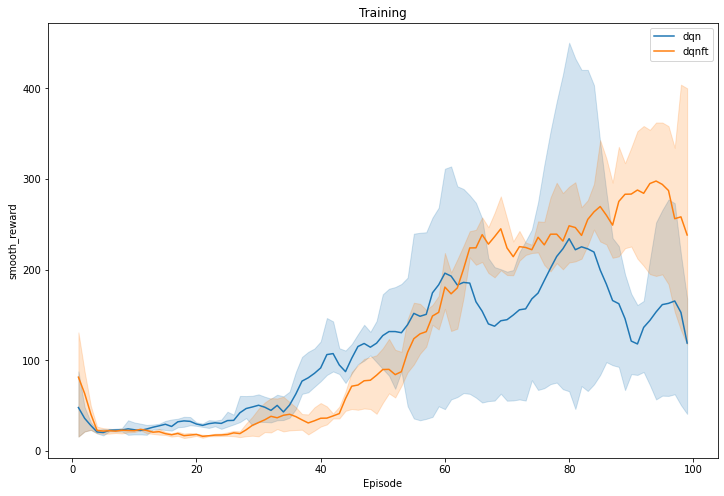

In [55]:
exps = [
    'out/CartPole-v1/dqn/EPS100-LR0.01-DF0.99',
    'out/CartPole-v1/dqnft/EPS100-LR0.01-DF0.99'
]

plot_comparison(exps, 'Training', 7)

### DQN Results

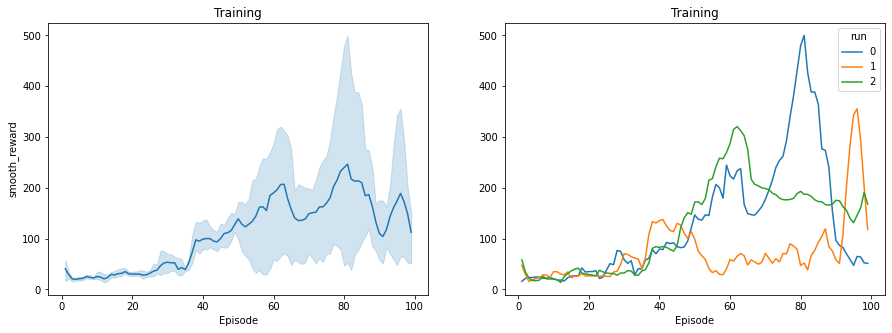

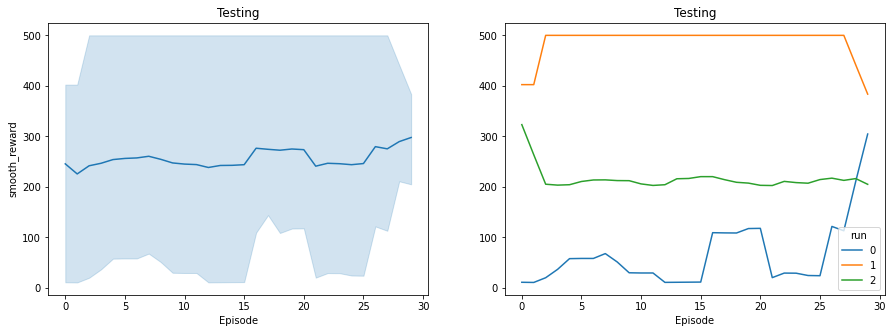

In [57]:
exp = 'out/CartPole-v1/dqn/EPS100-LR0.01-DF0.99'
plot_rewards(exp, 'Training', 5)
plot_rewards(exp, 'Testing', 5)

^Reinforcement learning is very unstable! The only difference in the above is the random seed, one agent solved the environment wheras another completley failed!